In [1]:
#INTERNSHIP TASK-3
#IMPLEMENT A NEURAL STYLE TRANSFER MODEL TO APPLY ARTISTIC STYLES TO PHOTOGRAPHS
#DELIVERABLE: A PYTHON SCRIPT OR NOTEBOOK WITH EXAMPLES OF STYLED IMAGES 
#TensorFlow Hub is an open repository and library for reusable machine learning.
import tensorflow_hub as hub
import tensorflow as tf
#Pyplot is a collection of functions in the popular visualization package Matplotlib. 
# It functions manipulate elements of a figure, such as creating a figure, creating a plotting area
from matplotlib import pyplot as plt
import numpy as np
#The'import cv2' statement brings the OpenCV library into the Python script, allowing access to its functions for computer vision and image processing
import cv2
#PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities
import PIL.Image

In [2]:
# Loads image as an encoded array of bytes
def load_image(img_path):
#This operation returns a tensor with the entire contents of the input filename
    img = tf.io.read_file(img_path)
#detects whether an image is a BMP, GIF and performs the appropriate operation to convert the input bytes string into a Tensor of type uint8
    img = tf.image.decode_image(img, channels=3)
#Convert image to dtype, scaling its values if needed.
    img = tf.image.convert_image_dtype(img, tf.float32)
#tf.newaxis enables us to add a dimension to our tensor while keeping the same information available
    img = img[tf.newaxis, :]
    return img

In [3]:
def tensor_to_image(tensor):
#Scale the tensor values from [0, 1] to [0, 255]
  tensor = tensor*255
# Convert the tensor to a NumPy array of type uint8 (unsigned 8-bit integer)
  tensor = np.array(tensor, dtype=np.uint8)
# Check if the tensor has more than 3 dimensions
  if np.ndim(tensor)>3:
# Ensure that the first dimension (batch size) is 1
    assert tensor.shape[0] == 1
# Remove the first dimension to get a single image
    tensor = tensor[0]
 # Convert the NumPy array to a PIL Image and return it
  return PIL.Image.fromarray(tensor)

In [4]:
# Load the content image from the specified file path
content_image = load_image(r'C:\Users\mouly\Desktop\Moulya Recording\pic1.PNG')
# Load the style image from the specified file path
style_image = load_image(r'C:\Users\mouly\Desktop\Moulya Recording\pic2.jpg')

In [5]:
# Get the shape (dimensions) of the content image
content_image.shape

TensorShape([1, 800, 1280, 3])

In [6]:
# Get the shape (dimensions) of the style image
style_image.shape

TensorShape([1, 297, 286, 3])

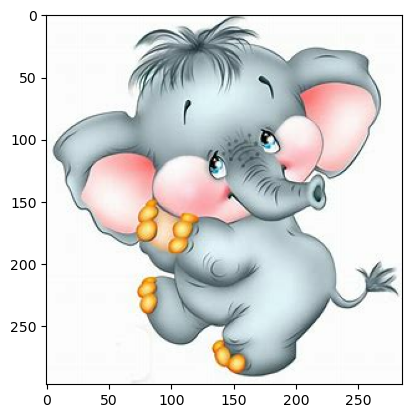

In [7]:
# Display the style image using Matplotlib
plt.imshow(np.squeeze(style_image))
# Show the plot with the displayed image
plt.show()

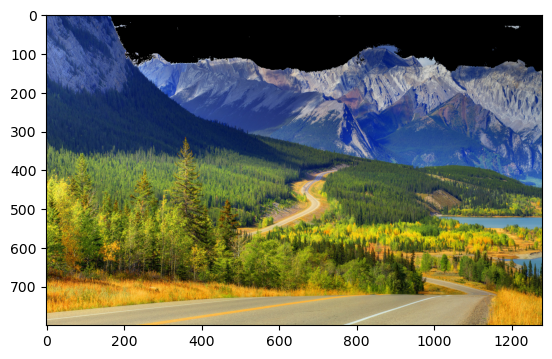

In [8]:
# Display the content image using Matplotlib
plt.imshow(np.squeeze(content_image))
# Show the plot with the displayed image
plt.show()

In [22]:
# Load the pre-trained image stylization model from TensorFlow Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [10]:
# Apply the stylization model to the content and style images
# Convert the images to TensorFlow constants and get the stylized output
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

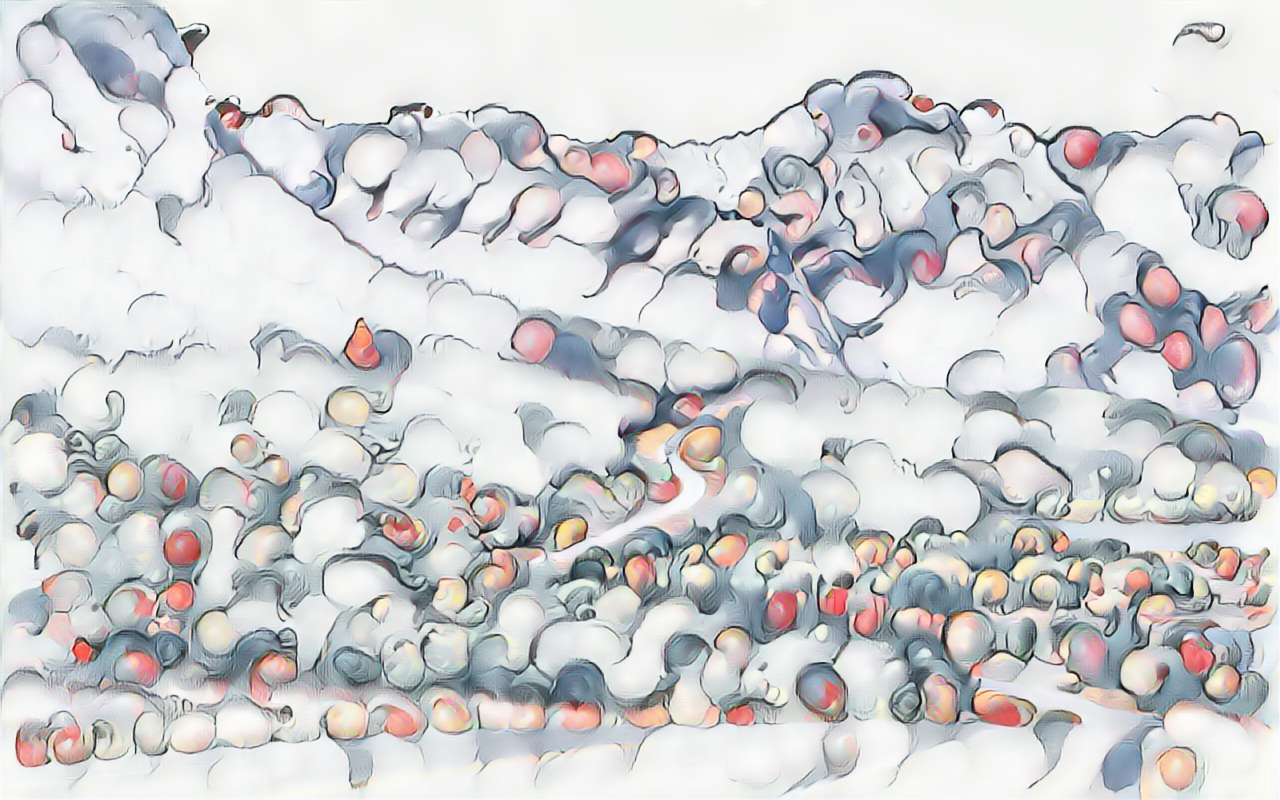

In [11]:
# Convert the stylized tensor to a PIL Image for visualization
tensor_to_image(stylized_image)